## Income Qualification
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
df_train.shape

(9557, 143)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
#different datatypes count
print(df_train.dtypes.value_counts())

int64      130
float64      8
object       5
dtype: int64


In [6]:
#number of missing values in each columns
for i in df_train.columns:
    if df_train[i].isnull().any()==True:
        print(i,":",df_train[i].isnull().sum())
    else:
        continue

v2a1 : 6860
v18q1 : 7342
rez_esc : 7928
meaneduc : 5
SQBmeaned : 5


### Data Cleaning

In [7]:
for i in ['v2a1','v18q1','rez_esc','meaneduc','SQBmeaned']:
    print(i,":",df_train[i].dtypes)

v2a1 : float64
v18q1 : float64
rez_esc : float64
meaneduc : float64
SQBmeaned : float64


In [8]:
#checking the distribution of values
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\PSingh\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\PSingh\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


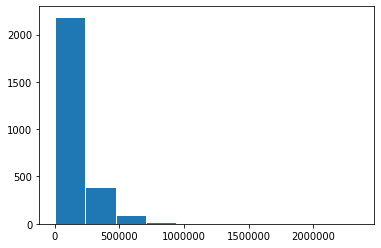

In [9]:
plt.hist(df_train['v2a1'],ec='white')
plt.show()

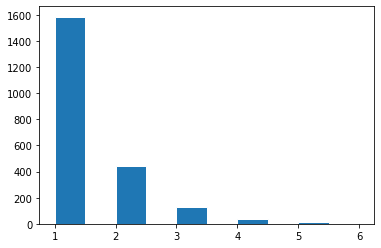

In [10]:
plt.hist(df_train['v18q1'],ec='white')
plt.show()

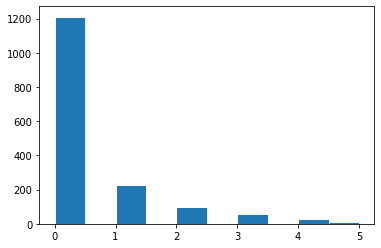

In [11]:
plt.hist(df_train['rez_esc'],ec='white')
plt.show()

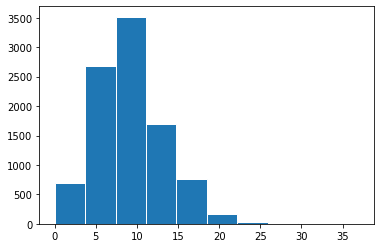

In [12]:
plt.hist(df_train['meaneduc'],ec='white')
plt.show()

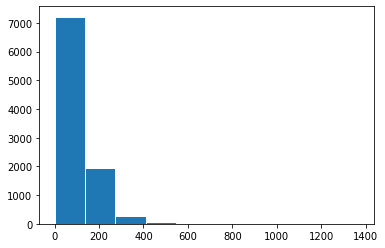

In [13]:
plt.hist(df_train['SQBmeaned'],ec='white')
plt.show()

'v2a1', 'v18q1', 'rez_esc' have more than 50% null values, because for v18q1, there are families with their own house so they won't pay rent in that case it should be 0 and similar is for v18q1 there can be families with 0 tablets.

Istead we can drop a column tipovivi3,v18q

tipovivi3, =1 rented
v18q, owns a tablet
as v2a1 alone can show both **as v18q1 alone can show that if respondent owns a tablet or not

In [14]:
df_train['v2a1'].fillna(0,inplace=True)
df_train['v18q1'].fillna(0,inplace=True)

In [15]:
df_train=df_train.drop(['tipovivi3', 'v18q','rez_esc','elimbasu5'],axis=1)

In [16]:
df_train['meaneduc'].fillna(df_train['meaneduc'].mean(),inplace=True)
df_train['SQBmeaned'].fillna(df_train['SQBmeaned'].mean(),inplace=True)

In [17]:
df_train.isna().any().value_counts()

False    139
dtype: int64

In [18]:
#determining the object data columns
for col in df_train.columns:
    if df_train[col].dtype=='object':
        print(col)

Id
idhogar
dependency
edjefe
edjefa


In [19]:
#Id feature is insignificant for perforrming analysis and is hence dropped
df_train=df_train.drop("Id",axis=1)

In [20]:
df_train['idhogar'].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
3fe29a56b    11
b7a0b59d7    11
             ..
7ef91ff79     1
3a0127383     1
9e45f5fbd     1
feb080b82     1
bbc9d8bd8     1
Name: idhogar, Length: 2988, dtype: int64

In [21]:
#idhogar feature is also insignificant for performing analysis and is hence dropped
df_train=df_train.drop("idhogar",axis=1)

In [22]:
df_train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
.80000001      18
3.5            18
1.25           18
2.25           13
.71428573      12
1.2            11
.22222222      11
.83333331      11
1.75           11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [23]:
#function to convert into float
def dep2float(dep):
    if dep=='yes':
        return float(1)
    elif dep=='no':
        return float(0)
    else:
        return float(dep)

In [24]:
df_train['dependency']=df_train['dependency'].apply(dep2float)

In [25]:
df_train['dependency'].dtype

dtype('float64')

In [26]:
df_train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [27]:
df_train['edjefa'].value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

In [28]:
#same mapping function can be used to convert into float
df_train['edjefe']=df_train['edjefe'].apply(dep2float)
df_train['edjefa']=df_train['edjefa'].apply(dep2float)

### Data Preperation and Preprocessing

In [29]:
df_train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [30]:
X=df_train.drop('Target',axis=1).values
Y=df_train["Target"].values
print(X.shape,Y.shape)

(9557, 136) (9557,)


In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(X,Y,test_size=0.3)

### Data Modelling using Random Forest Classifier

In [33]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [34]:
rf.fit(xtr,ytr)
pred=rf.predict(xts)

In [35]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [36]:
print(classification_report(yts,pred))

              precision    recall  f1-score   support

           1       0.97      0.78      0.86       234
           2       0.88      0.84      0.86       455
           3       0.95      0.67      0.79       384
           4       0.90      0.99      0.94      1795

    accuracy                           0.91      2868
   macro avg       0.92      0.82      0.86      2868
weighted avg       0.91      0.91      0.90      2868



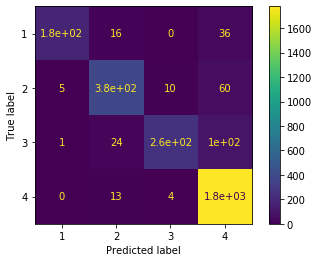

In [37]:
plot_confusion_matrix(rf,xts,yts)

In [38]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [39]:
knn.fit(xtr,ytr)
pred_knn=rf.predict(xts)

In [40]:
print(classification_report(yts,pred_knn))

              precision    recall  f1-score   support

           1       0.97      0.78      0.86       234
           2       0.88      0.84      0.86       455
           3       0.95      0.67      0.79       384
           4       0.90      0.99      0.94      1795

    accuracy                           0.91      2868
   macro avg       0.92      0.82      0.86      2868
weighted avg       0.91      0.91      0.90      2868



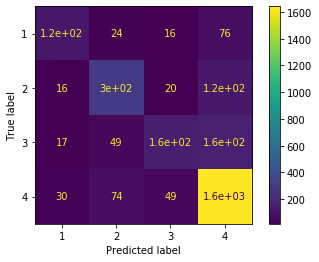

In [41]:
plot_confusion_matrix(knn,xts,yts)

In [42]:
#XGBoost
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=50)

In [43]:
xgb.fit(xtr,ytr)
pred_xgb=xgb.predict(xts)

In [44]:
print(classification_report(yts,pred_xgb))

              precision    recall  f1-score   support

           1       0.94      0.80      0.86       234
           2       0.85      0.86      0.86       455
           3       0.93      0.69      0.79       384
           4       0.92      0.98      0.95      1795

    accuracy                           0.91      2868
   macro avg       0.91      0.84      0.87      2868
weighted avg       0.91      0.91      0.91      2868



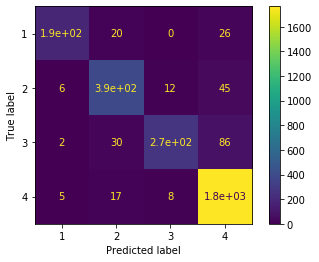

In [45]:
plot_confusion_matrix(xgb,xts,yts)

**Random Forest Classifier** gave the best results for predictions

### Cleaning the test data and making predictions

In [46]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [47]:
#number of missing values in each columns
for i in df_test.columns:
    if df_test[i].isnull().any()==True:
        print(i,":",df_test[i].isnull().sum())
    else:
        continue

v2a1 : 17403
v18q1 : 18126
rez_esc : 19653
meaneduc : 31
SQBmeaned : 31


In [48]:
df_test['v2a1'].fillna(0,inplace=True)
df_test['v18q1'].fillna(0,inplace=True)

In [49]:
df_test=df_test.drop(['Id','idhogar','tipovivi3', 'v18q','rez_esc','elimbasu5'],axis=1)

In [50]:
df_test['meaneduc'].fillna(df_test['meaneduc'].mean(),inplace=True)
df_test['SQBmeaned'].fillna(df_test['SQBmeaned'].mean(),inplace=True)

In [51]:
df_test['dependency']=df_test['dependency'].apply(dep2float)
df_test['edjefe']=df_test['edjefe'].apply(dep2float)
df_test['edjefa']=df_test['edjefa'].apply(dep2float)

In [52]:
xtest=df_test.values

In [53]:
xtest=ss.fit_transform(xtest)

In [54]:
Ypred=rf.predict(xtest)

In [55]:
df_test['Target']=Ypred